# Add 방식

In [1]:
from sklearn.datasets import load_iris
import numpy as np
import tensorflow as tf
from tensorflow import keras

import pandas as pd
from tensorflow.keras.utils import plot_model

In [2]:
data = load_iris()

In [3]:
y = data.target
x = pd.DataFrame(data.data, columns = data.feature_names)
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
x.shape, y.shape

((150, 4), (150,))

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = \
    train_test_split(x, y, test_size = 0.2)

- Sepal, Petal 따로하기

In [6]:
x_train.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [7]:
tr_x_se = x_train.loc[:, ['sepal length (cm)','sepal width (cm)']]
tr_x_pe = x_train.loc[:,['petal length (cm)','petal width (cm)']]

In [8]:
ts_x_se = x_test.loc[:, ['sepal length (cm)','sepal width (cm)']]
ts_x_pe = x_test.loc[:,['petal length (cm)','petal width (cm)']]

- One-Hot Encoding

In [9]:
class_n = len(set(y_test))

In [10]:
from tensorflow.keras.utils import to_categorical
y_test = to_categorical(y_test, class_n)
y_train = to_categorical(y_train, class_n)

In [11]:
tr_x_se.shape, tr_x_pe.shape, y_train.shape

((120, 2), (120, 2), (120, 3))

In [12]:
# 1. 세션 클리어
keras.backend.clear_session()

# 2. model layer 엮기
il_se = keras.layers.Input(shape=(2,))
il_pe = keras.layers.Input(shape=(2,))

hl_se = keras.layers.Dense(8, activation = 'relu')(il_se)
hl_pe = keras.layers.Dense(8, activation = 'relu')(il_pe)

add_l = keras.layers.add([hl_se,hl_pe])
ol = keras.layers.Dense(3, activation = 'softmax')(add_l)

# 3. model input, output 정의
model = keras.models.Model([il_se, il_pe], ol)

# 4. model compile 
model.compile(loss = keras.losses.categorical_crossentropy, metrics = ['accuracy'],
              optimizer = 'adam')

# 5. 요약
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 2)]          0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 2)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 8)            24          ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 8)            24          ['input_2[0][0]']                
                                                                                              

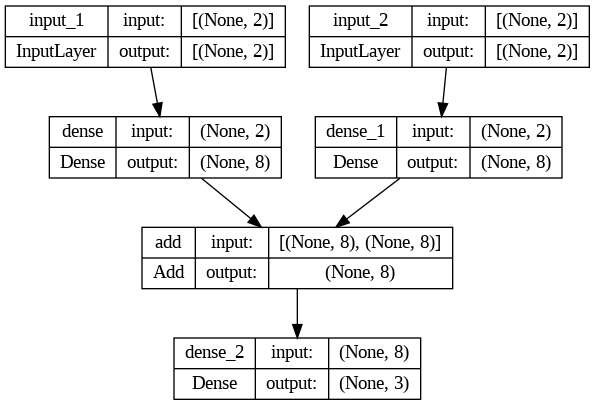

In [13]:
plot_model(model, show_shapes= True)

In [14]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor = 'val_loss',
                   min_delta=0,                # 임계값 : 관측 대상이 임계값만큼 변하지 않는다면 patience 1 증가
                   patience=10,                # 관측 대상 성능이 개선되지 않을 때 몇 번 더 지켜볼래
                   verbose=1,
                   restore_best_weights=True)

In [15]:
model.fit([tr_x_se, tr_x_pe], y_train, validation_split=0.2,
          epochs=10000, verbose=1, callbacks=[es])

Epoch 1/10000
3/3 [==============================] - 1s 155ms/step - loss: 1.6906 - accuracy: 0.3333 - val_loss: 1.5870 - val_accuracy: 0.3750
Epoch 2/10000
3/3 [==============================] - 0s 18ms/step - loss: 1.5994 - accuracy: 0.3333 - val_loss: 1.5137 - val_accuracy: 0.3750
Epoch 3/10000
3/3 [==============================] - 0s 20ms/step - loss: 1.5236 - accuracy: 0.3333 - val_loss: 1.4532 - val_accuracy: 0.3750
Epoch 4/10000
3/3 [==============================] - 0s 18ms/step - loss: 1.4676 - accuracy: 0.3333 - val_loss: 1.4068 - val_accuracy: 0.3333
Epoch 5/10000
3/3 [==============================] - 0s 18ms/step - loss: 1.4114 - accuracy: 0.2812 - val_loss: 1.3753 - val_accuracy: 0.2917
Epoch 6/10000
3/3 [==============================] - 0s 17ms/step - loss: 1.3765 - accuracy: 0.2292 - val_loss: 1.3551 - val_accuracy: 0.1667
Epoch 7/10000
3/3 [==============================] - 0s 22ms/step - loss: 1.3499 - accuracy: 0.1771 - val_loss: 1.3437 - val_accuracy: 0.1667
Epoch

In [17]:
y_pred = model.predict([ts_x_se, ts_x_pe])

1/1 [==============================] - 0s 112ms/step


In [18]:
y_test[:5]

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

In [19]:
y_pred[:5]

array([[5.8604466e-05, 9.7859150e-01, 2.1349955e-02],
       [3.1347806e-04, 7.9430991e-01, 2.0537654e-01],
       [1.8568083e-03, 9.8955244e-01, 8.5908398e-03],
       [6.7741952e-05, 8.9851588e-01, 1.0141636e-01],
       [1.4146870e-03, 9.9633062e-01, 2.2546991e-03]], dtype=float32)

# Concatenate

In [22]:
# 1. 세션 클리어
keras.backend.clear_session()

# 2. layer 엮기
il_se = keras.layers.Input(shape=(2,))
il_pe = keras.layers.Input(shape=(2,))

hl_se = keras.layers.Dense(8, activation = 'relu')(il_se)
hl_pe = keras.layers.Dense(8, activation = 'relu')(il_pe)

cl = keras.layers.concatenate([hl_se, hl_pe])
ol = keras.layers.Dense(3, activation = 'softmax')(cl)

# model input, output 지정
model = keras.models.Model([il_se, il_pe], ol)

# model.complie
model.compile(loss='categorical_crossentropy', metrics=['accuracy'],
              optimizer='adam')

model.summary()

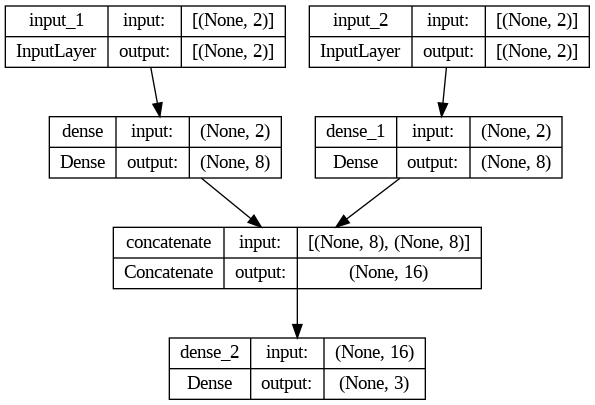

In [23]:
plot_model(model, show_shapes=True)

In [24]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor = 'val_loss',
                   min_delta=0,                # 임계값 : 관측 대상이 임계값만큼 변하지 않는다면 patience 1 증가
                   patience=10,                # 관측 대상 성능이 개선되지 않을 때 몇 번 더 지켜볼래
                   verbose=1,
                   restore_best_weights=True)

In [25]:
model.fit([tr_x_se, tr_x_pe], y_train, validation_split=0.2,
          epochs=10000, verbose=1, callbacks=[es])

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Epoch 709/10000
3/3 [==============================] - 0s 69ms/step - loss: 0.4460 - accuracy: 0.8958 - val_loss: 0.4613 - val_accuracy: 0.8750
Epoch 710/10000
3/3 [==============================] - 0s 67ms/step - loss: 0.4451 - accuracy: 0.9062 - val_loss: 0.4607 - val_accuracy: 0.8750
Epoch 711/10000
3/3 [==============================] - 0s 55ms/step - loss: 0.4448 - accuracy: 0.9062 - val_loss: 0.4601 - val_accuracy: 0.8750
Epoch 712/10000
3/3 [==============================] - 0s 59ms/step - loss: 0.4440 - accuracy: 0.9062 - val_loss: 0.4594 - val_accuracy: 0.8750
Epoch 713/10000
3/3 [==============================] - 0s 56ms/step - loss: 0.4435 - accuracy: 0.9062 - val_loss: 0.4591 - val_accuracy: 0.8750
Epoch 714/10000
3/3 [==============================] - 0s 47ms/step - loss: 0.4433 - accuracy: 0.9062 - val_loss: 0.4590 - val_accuracy: 0.8750
Epoch 715/10000
3/3 [==============================] - 0s 67ms/step - loss: 0.4425 - accuracy: 0.916

In [26]:
y_pred = model.predict([ts_x_se, ts_x_pe])

1/1 [==============================] - 0s 112ms/step


In [27]:
y_pred[:5]

array([[1.1338797e-05, 9.9021780e-01, 9.7708106e-03],
       [1.5104276e-03, 8.3754867e-01, 1.6094092e-01],
       [2.5124222e-03, 9.9377847e-01, 3.7091428e-03],
       [4.3572443e-05, 9.2763627e-01, 7.2320104e-02],
       [1.3931544e-04, 9.9879241e-01, 1.0682989e-03]], dtype=float32)

In [28]:
y_test[:5]

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)